In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv("C:/Users/tomas/Desktop/Warsztat-Ai/warsztat-ai/datasets/autentykacja_eeg.csv",delimiter=";")
X = df.drop('Flag', axis=1)
y = df['Flag']

In [3]:
param_grid={'model__n_neighbors':[n for n in range(1,30)]}
pipe = Pipeline([
 #    ('select', SelectKBest(f_classif, k=7)),
 #   ('scale', StandardScaler()),
    ('scale', QuantileTransformer(output_distribution='normal', random_state=0)),
    ('model', KNeighborsClassifier())
        ])

pipe.get_params()



{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [4]:
mod = GridSearchCV(estimator=pipe,
                    param_grid=param_grid,
                    cv=10)
mod.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29]})

In [5]:
print("Best Parameters: ", mod.best_params_)
print("Best Accuracy: ", mod.best_score_)

Best Parameters:  {'model__n_neighbors': 1}
Best Accuracy:  0.8421119592875318


In [6]:
results = pd.DataFrame(mod.cv_results_)
#print(results)


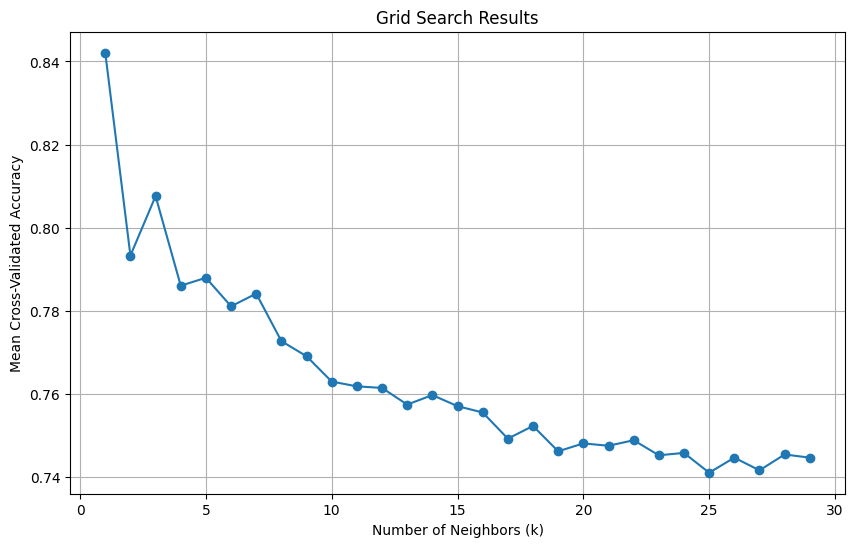

In [7]:
param_values = np.array(results['param_model__n_neighbors'].values.astype(int), dtype=int)
mean_scores = results['mean_test_score']


plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.grid(True)
plt.show()

# **RESULTS AND TODO**
- finish and apply more advanced techniques
- find the reason why k=1 is giving best accuracy (maybe becouse of dense data distribution ?)

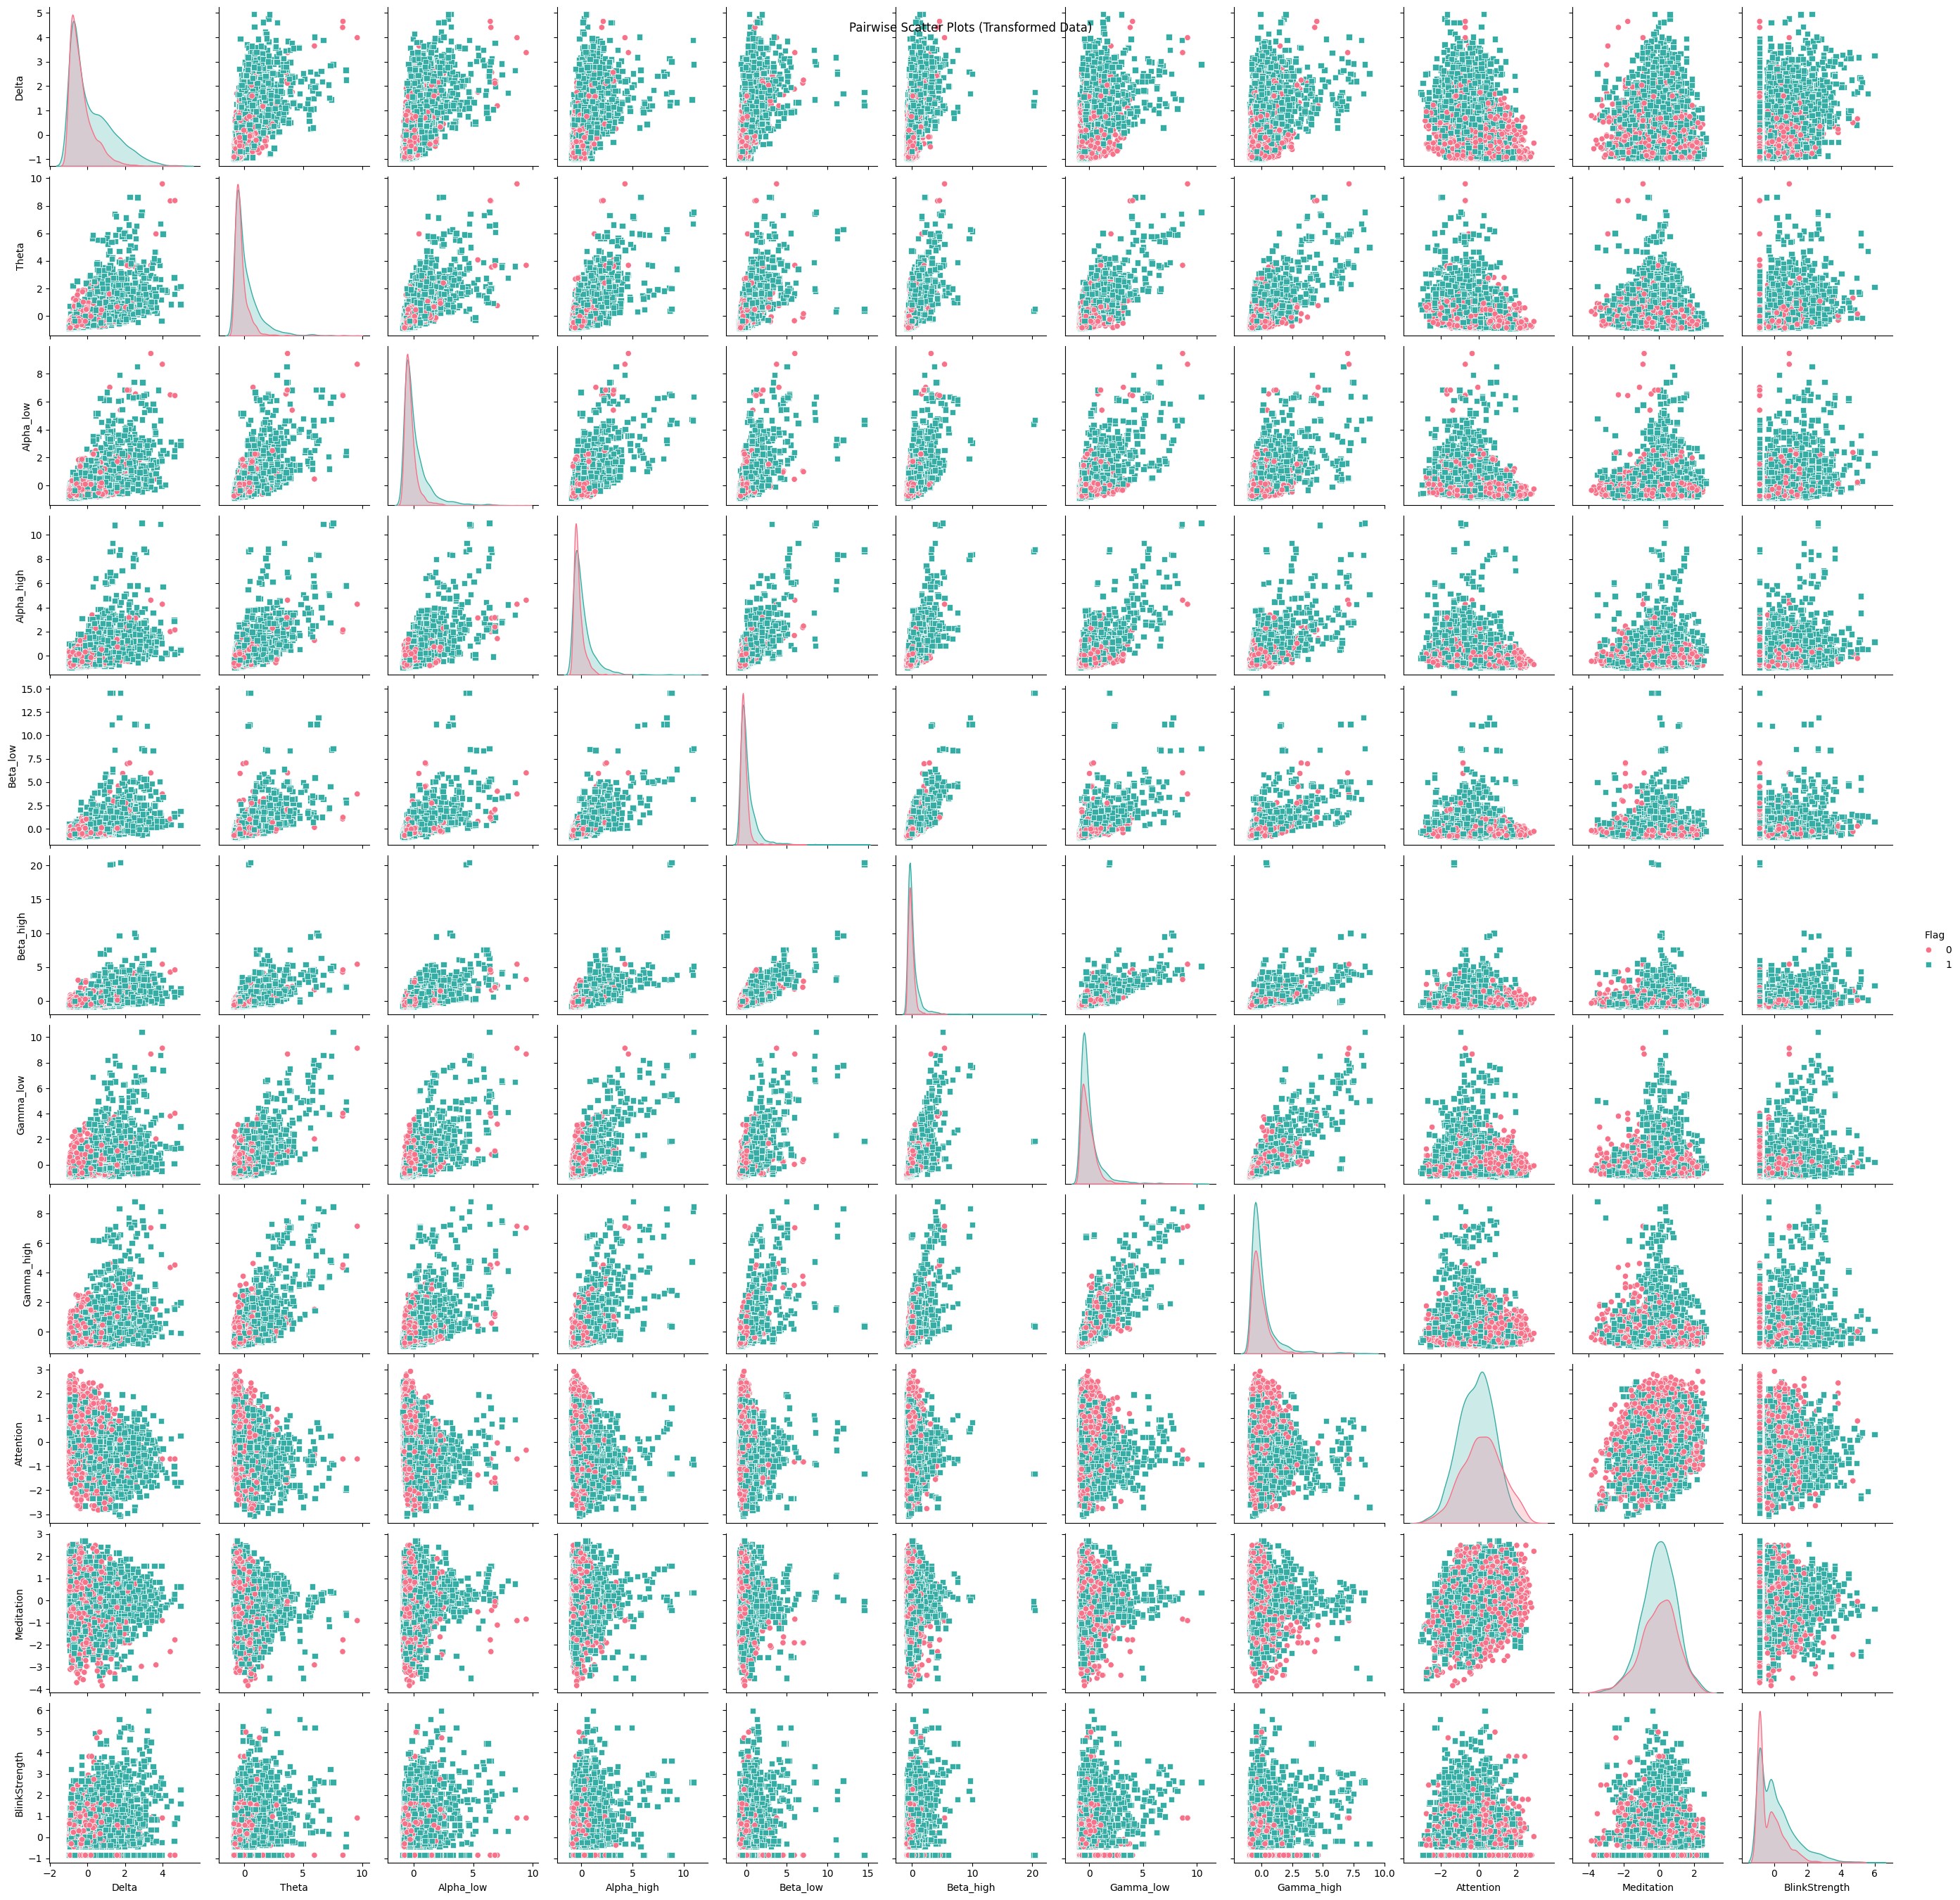

In [8]:
# Get the best model
best_model = mod.best_estimator_

# Transform the data using the best model
transformed_data = best_model.named_steps['scale'].transform(X)

# Visualize the transformed data
# For example, you can create a pairplot similar to your EDA code
transformed_df = pd.DataFrame(transformed_data, columns=X.columns)
transformed_df['Flag'] = y  # Add the target variable back for hue
sns.pairplot(transformed_df, hue='Flag', markers=["o", "s"], palette="husl")
plt.suptitle('Pairwise Scatter Plots (Transformed Data)')
plt.show()